Tech Challenge - Group 61

In [1]:
# PHASE 04

# Matheus Diniz
# Miguel Chiarello
# Taynara Nascimento

SETTINGS

In [2]:
## Data Analysis Library 
# import polars as pl
import pandas as pd
import numpy as np
import ipeadatapy as idpy

## DataViz Library 
import matplotlib.pyplot as plt
import seaborn as sns

## ML Library 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


## Docs
# https://www.pola.rs/
# https://pandas.pydata.org/docs/reference/index.html
# https://numpy.org/numpy-tutorials/
# https://matplotlib.org/stable/plot_types/index.html
# https://scikit-learn.org/stable/modules/classes.html


## Tech Challenge Reference
# https://on.fiap.com.br/mod/conteudoshtml/view.php?id=358318&c=9996&sesskey=LH7fswE55A
# http://www.ipeadata.gov.br/Default.aspx
# https://finalytics.streamlit.app/

EXTRACTING

    API Oil Price

In [7]:
db_oil = idpy.timeseries("EIA366_PBRENT366").reset_index()
db_oil.head()

,DATE,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (US$)
0,1986-01-04,EIA366_PBRENT366,1986-01-04T00:00:00-02:00,4,1,1986,NaN
1,1986-01-05,EIA366_PBRENT366,1986-01-05T00:00:00-02:00,5,1,1986,NaN
2,1986-01-06,EIA366_PBRENT366,1986-01-06T00:00:00-02:00,6,1,1986,NaN
3,1986-01-07,EIA366_PBRENT366,1986-01-07T00:00:00-02:00,7,1,1986,NaN
4,1986-01-08,EIA366_PBRENT366,1986-01-08T00:00:00-02:00,8,1,1986,NaN


In [12]:
db_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13358 entries, 0 to 13357
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         13358 non-null  datetime64[ns]
 1   CODE         13358 non-null  object        
 2   RAW DATE     13358 non-null  object        
 3   DAY          13358 non-null  int64         
 4   MONTH        13358 non-null  int64         
 5   YEAR         13358 non-null  int64         
 6   VALUE (US$)  11088 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 730.6+ KB


In [13]:
db_oil.describe()

,DAY,MONTH,YEAR,VALUE (US$)
count,13358.000000,13358.000000,13358.000000,11088.000000
mean,15.722788,6.510780,2003.867121,52.786374
std,8.790647,3.451196,10.665934,33.231925
min,1.000000,1.000000,1986.000000,9.100000
25%,8.000000,4.000000,1995.000000,20.400000
50%,16.000000,7.000000,2004.000000,47.880000
75%,23.000000,10.000000,2013.000000,75.702500
max,31.000000,12.000000,2024.000000,143.950000


    API Euro Value

In [8]:
db_euro = idpy.timeseries("GM366_EREURO366").reset_index()
db_euro.head()

,DATE,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (Euro)
0,1999-01-04,GM366_EREURO366,1999-01-04T00:00:00-02:00,4,1,1999,0.841157
1,1999-01-05,GM366_EREURO366,1999-01-05T00:00:00-02:00,5,1,1999,0.847678
2,1999-01-06,GM366_EREURO366,1999-01-06T00:00:00-02:00,6,1,1999,0.859567
3,1999-01-07,GM366_EREURO366,1999-01-07T00:00:00-02:00,7,1,1999,0.852447
4,1999-01-08,GM366_EREURO366,1999-01-08T00:00:00-02:00,8,1,1999,0.861268


In [14]:
db_euro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8229 entries, 0 to 8228
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          8229 non-null   datetime64[ns]
 1   CODE          8229 non-null   object        
 2   RAW DATE      8229 non-null   object        
 3   DAY           8229 non-null   int64         
 4   MONTH         8229 non-null   int64         
 5   YEAR          8229 non-null   int64         
 6   VALUE (Euro)  6283 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 450.1+ KB


In [15]:
db_euro.describe()

,DAY,MONTH,YEAR,VALUE (Euro)
count,8229.000000,8229.000000,8229.000000,6283.000000
mean,15.764370,6.510876,2010.079354,0.856393
std,8.787283,3.451981,6.960486,0.117520
min,1.000000,1.000000,1999.000000,0.625078
25%,8.000000,4.000000,2004.000000,0.765080
50%,16.000000,7.000000,2010.000000,0.846736
75%,23.000000,10.000000,2015.000000,0.919456
max,31.000000,12.000000,2024.000000,1.204801


    API Dolar Value

In [9]:
db_dolar = idpy.timeseries("BM12_ERC12").reset_index()
db_dolar.head()

,DATE,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (R$)
0,1953-01-01,BM12_ERC12,1953-01-01T00:00:00-02:00,1,1,1953,6.683636e-15
1,1953-02-01,BM12_ERC12,1953-02-01T00:00:00-02:00,1,2,1953,1.337829e-14
2,1953-03-01,BM12_ERC12,1953-03-01T00:00:00-03:00,1,3,1953,1.337829e-14
3,1953-04-01,BM12_ERC12,1953-04-01T00:00:00-03:00,1,4,1953,1.488364e-14
4,1953-05-01,BM12_ERC12,1953-05-01T00:00:00-03:00,1,5,1953,1.427567e-14


In [16]:
db_dolar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        852 non-null    datetime64[ns]
 1   CODE        852 non-null    object        
 2   RAW DATE    852 non-null    object        
 3   DAY         852 non-null    int64         
 4   MONTH       852 non-null    int64         
 5   YEAR        852 non-null    int64         
 6   VALUE (R$)  852 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 46.7+ KB


In [17]:
db_dolar.describe()

,DAY,MONTH,YEAR,VALUE (R$)
count,852.0,852.00000,852.000000,8.520000e+02
mean,1.0,6.50000,1988.000000,1.103494e+00
std,0.0,3.45408,20.505939,1.547338e+00
min,1.0,1.00000,1953.000000,6.683636e-15
25%,1.0,3.75000,1970.000000,1.701818e-12
50%,1.0,6.50000,1988.000000,7.130364e-08
75%,1.0,9.25000,2006.000000,2.030658e+00
max,1.0,12.00000,2023.000000,5.650604e+00


    API IPC

In [10]:
db_ipc = idpy.timeseries("IGP366_IPCS366").reset_index()
db_ipc.head()

,DATE,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE ((% a.m.))
0,2003-01-29,IGP366_IPCS366,2003-01-29T00:00:00-02:00,29,1,2003,2.18
1,2003-01-30,IGP366_IPCS366,2003-01-30T00:00:00-02:00,30,1,2003,NaN
2,2003-01-31,IGP366_IPCS366,2003-01-31T00:00:00-02:00,31,1,2003,NaN
3,2003-02-01,IGP366_IPCS366,2003-02-01T00:00:00-02:00,1,2,2003,NaN
4,2003-02-02,IGP366_IPCS366,2003-02-02T00:00:00-02:00,2,2,2003,NaN


In [18]:
db_ipc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5156 entries, 0 to 5155
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE              5156 non-null   datetime64[ns]
 1   CODE              5156 non-null   object        
 2   RAW DATE          5156 non-null   object        
 3   DAY               5156 non-null   int64         
 4   MONTH             5156 non-null   int64         
 5   YEAR              5156 non-null   int64         
 6   VALUE ((% a.m.))  1012 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 282.1+ KB


In [19]:
db_ipc.describe()

,DAY,MONTH,YEAR,VALUE ((% a.m.))
count,5156.000000,5156.000000,5156.000000,1012.000000
mean,15.944725,6.502327,2009.884794,0.486542
std,8.825864,3.455157,4.584365,0.383807
min,1.000000,1.000000,2003.000000,-1.280000
25%,8.000000,3.000000,2006.000000,0.260000
50%,16.000000,7.000000,2010.000000,0.470000
75%,23.000000,10.000000,2013.000000,0.710000
max,31.000000,12.000000,2023.000000,2.180000


    API Nasdaq

In [11]:
db_nasdaq = idpy.timeseries("SGS366_NASDAQ366").reset_index()
db_nasdaq.head()

,DATE,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (-)
0,1971-02-05,SGS366_NASDAQ366,1971-02-05T00:00:00-02:00,5,2,1971,100.00
1,1971-02-06,SGS366_NASDAQ366,1971-02-06T00:00:00-02:00,6,2,1971,NaN
2,1971-02-07,SGS366_NASDAQ366,1971-02-07T00:00:00-02:00,7,2,1971,NaN
3,1971-02-08,SGS366_NASDAQ366,1971-02-08T00:00:00-02:00,8,2,1971,100.84
4,1971-02-09,SGS366_NASDAQ366,1971-02-09T00:00:00-02:00,9,2,1971,100.76


In [20]:
db_nasdaq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18413 entries, 0 to 18412
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE       18413 non-null  datetime64[ns]
 1   CODE       18413 non-null  object        
 2   RAW DATE   18413 non-null  object        
 3   DAY        18413 non-null  int64         
 4   MONTH      18413 non-null  int64         
 5   YEAR       18413 non-null  int64         
 6   VALUE (-)  13320 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 1007.1+ KB


In [21]:
db_nasdaq.describe()

,DAY,MONTH,YEAR,VALUE (-)
count,18413.000000,18413.000000,18413.000000,13320.000000
mean,15.730516,6.526422,1995.941020,2534.415154
std,8.794096,3.444309,14.782815,3454.815384
min,1.000000,1.000000,1971.000000,54.870000
25%,8.000000,4.000000,1983.000000,272.962500
50%,16.000000,7.000000,1996.000000,1315.140000
75%,23.000000,10.000000,2008.000000,2804.230000
max,31.000000,12.000000,2024.000000,16057.440000


TRANSFORMING

    DataBase Oil Price

In [24]:
## ADJUSTING DATA BASE DIMENSIONS AND DATA TYPE

db_oil = db_dolar.rename(columns={'DATE': 'date', 'DAY': 'day', 'MONTH': 'month', 'YEAR': 'year', 'VALUE (US$)': 'oil_value_usd'})
db_dolar = db_oil.dropna(subset="oil_value_usd")

db_oil['date'] = pd.to_datetime(db_oil['date'], format='%d.%m.%Y')
db_oil['week_date'] = db_oil['date'].dt.day_name()
# db_oil['year'] = db_oil['year'].astype('int64')
# db_oil['oil_value_usd'] = db_oil['oil_value_usd'].astype(float)

db_oil = db_oil[['date', 'year', 'month', 'day', 'week_date', 'oil_value_usd']]

db_oil.head()

,date,year,month,day,week_date,oil_value_usd
499,1987-05-20,1987,5,20,Wednesday,18.63
500,1987-05-21,1987,5,21,Thursday,18.45
501,1987-05-22,1987,5,22,Friday,18.55
504,1987-05-25,1987,5,25,Monday,18.60
505,1987-05-26,1987,5,26,Tuesday,18.63


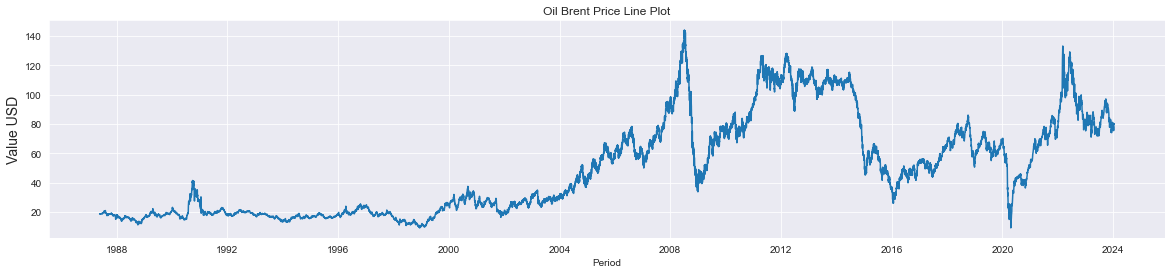

In [25]:
## SETTING TIME SERIES LINE PLOT 

sns.set_style('darkgrid')
plt.figure(figsize=(20, 4))

plt.title('Oil Brent Price Line Plot', fontsize=12)
plt.ylabel('Value USD', fontsize=14)
plt.xlabel('Period')

sns.lineplot(x=db_oil['date'], y=db_oil['oil_value_usd'])

plt.show()

    DataBase Euro Value

In [30]:
## ADJUSTING DATA BASE DIMENSIONS AND DATA TYPE

db_euro = db_euro.rename(columns={'DATE': 'date', 'DAY': 'day', 'MONTH': 'month', 'YEAR': 'year', 'VALUE (Euro)': 'euro_value_usd'})
db_euro = db_euro.dropna(subset="euro_value_usd")

db_euro['date'] = pd.to_datetime(db_euro['date'], format='%d.%m.%Y')
db_euro['week_date'] = db_euro['date'].dt.day_name()
# db_euro['year'] = db_euro['year'].astype('int64')
# db_euro['dolar_value_brl'] = db_euro['oil_value_usd'].astype(float)

db_euro = db_euro[['date', 'year', 'month', 'day', 'week_date', 'euro_value_usd']]

db_euro.head()

,date,year,month,day,week_date,euro_value_usd
0,1999-01-04,1999,1,4,Monday,0.841157
1,1999-01-05,1999,1,5,Tuesday,0.847678
2,1999-01-06,1999,1,6,Wednesday,0.859567
3,1999-01-07,1999,1,7,Thursday,0.852447
4,1999-01-08,1999,1,8,Friday,0.861268


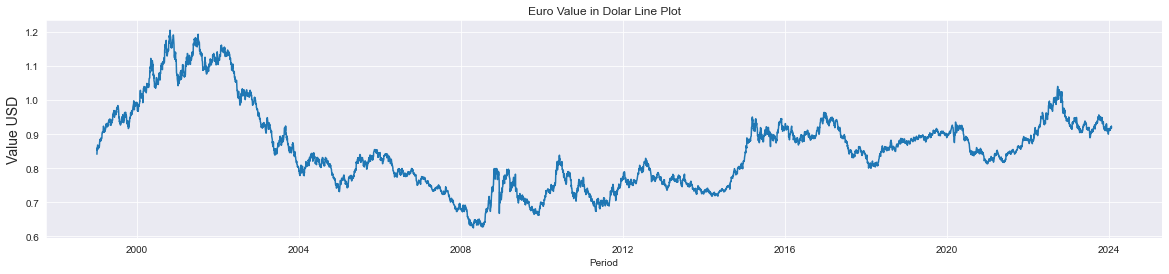

In [31]:
## SETTING TIME SERIES LINE PLOT 

sns.set_style('darkgrid')
plt.figure(figsize=(20, 4))

plt.title('Euro Value in Dolar Line Plot', fontsize=12)
plt.ylabel('Value USD', fontsize=14)
plt.xlabel('Period')

sns.lineplot(x=db_euro['date'], y=db_euro['euro_value_usd'])

plt.show()

    DataBase Dolar Value

In [27]:
## ADJUSTING DATA BASE DIMENSIONS AND DATA TYPE

db_dolar = db_dolar.rename(columns={'DATE': 'date', 'DAY': 'day', 'MONTH': 'month', 'YEAR': 'year', 'VALUE (R$)': 'dolar_value_brl'})
db_dolar = db_dolar.dropna(subset="dolar_value_brl")

db_dolar['date'] = pd.to_datetime(db_dolar['date'], format='%d.%m.%Y')
db_dolar['week_date'] = db_dolar['date'].dt.day_name()
# db_dolar['year'] = db_dolar['year'].astype('int64')
# db_dolar['dolar_value_brl'] = db_dolar['oil_value_usd'].astype(float)

db_dolar = db_dolar[['date', 'year', 'month', 'day', 'week_date', 'dolar_value_brl']]

db_dolar.head()

,date,year,month,day,week_date,dolar_value_brl
0,1953-01-01,1953,1,1,Thursday,6.683636e-15
1,1953-02-01,1953,2,1,Sunday,1.337829e-14
2,1953-03-01,1953,3,1,Sunday,1.337829e-14
3,1953-04-01,1953,4,1,Wednesday,1.488364e-14
4,1953-05-01,1953,5,1,Friday,1.427567e-14


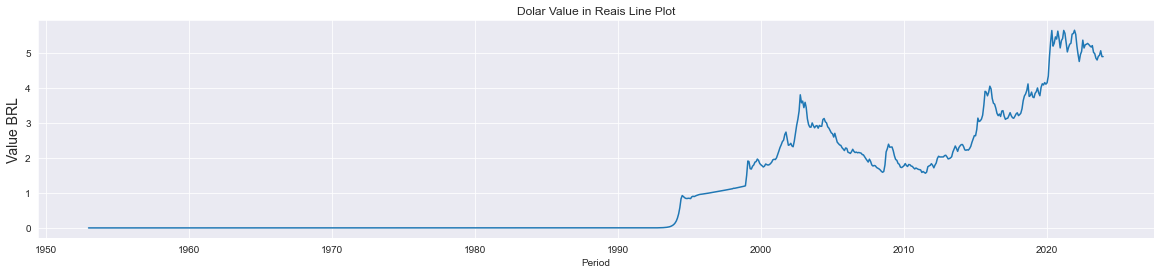

In [28]:
## SETTING TIME SERIES LINE PLOT 

sns.set_style('darkgrid')
plt.figure(figsize=(20, 4))

plt.title('Dolar Value in Reais Line Plot', fontsize=12)
plt.ylabel('Value BRL', fontsize=14)
plt.xlabel('Period')

sns.lineplot(x=db_dolar['date'], y=db_dolar['dolar_value_brl'])

plt.show()

    DataBase IPC

In [32]:
## ADJUSTING DATA BASE DIMENSIONS AND DATA TYPE

db_ipc = db_ipc.rename(columns={'DATE': 'date', 'DAY': 'day', 'MONTH': 'month', 'YEAR': 'year', 'VALUE ((% a.m.))': 'ipc_value_percent_a_m'})
db_ipc = db_ipc.dropna(subset="ipc_value_percent_a_m")

db_ipc['date'] = pd.to_datetime(db_ipc['date'], format='%d.%m.%Y')
db_ipc['week_date'] = db_ipc['date'].dt.day_name()
# db_ipc['year'] = db_ipc['year'].astype('int64')
# db_ipc['dolar_value_brl'] = db_ipc['oil_value_usd'].astype(float)

db_ipc = db_ipc[['date', 'year', 'month', 'day', 'week_date', 'ipc_value_percent_a_m']]

db_ipc.head()

,date,year,month,day,week_date,ipc_value_percent_a_m
0,2003-01-29,2003,1,29,Wednesday,2.18
8,2003-02-06,2003,2,6,Thursday,2.16
14,2003-02-12,2003,2,12,Wednesday,1.83
20,2003-02-18,2003,2,18,Tuesday,1.55
29,2003-02-27,2003,2,27,Thursday,1.22


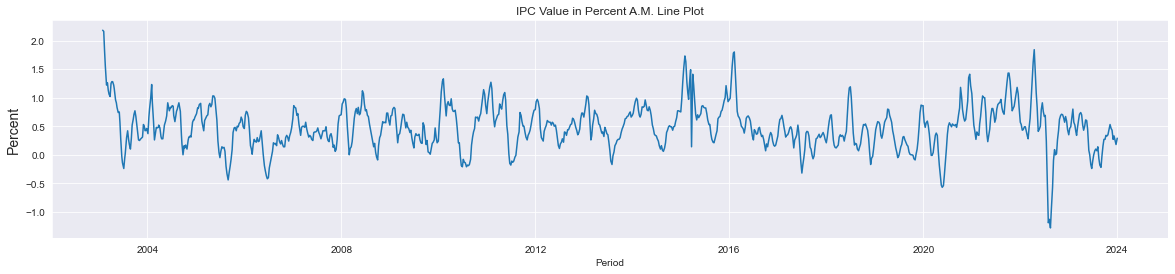

In [33]:
## SETTING TIME SERIES LINE PLOT 

sns.set_style('darkgrid')
plt.figure(figsize=(20, 4))

plt.title('IPC Value in Percent A.M. Line Plot', fontsize=12)
plt.ylabel('Percent', fontsize=14)
plt.xlabel('Period')

sns.lineplot(x=db_ipc['date'], y=db_ipc['ipc_value_percent_a_m'])

plt.show()

    DataBase Nasdaq

In [34]:
## ADJUSTING DATA BASE DIMENSIONS AND DATA TYPE

db_nasdaq = db_nasdaq.rename(columns={'DATE': 'date', 'DAY': 'day', 'MONTH': 'month', 'YEAR': 'year', 'VALUE (-)': 'nasdaq_value'})
db_nasdaq = db_nasdaq.dropna(subset="nasdaq_value")

db_nasdaq['date'] = pd.to_datetime(db_nasdaq['date'], format='%d.%m.%Y')
db_nasdaq['week_date'] = db_nasdaq['date'].dt.day_name()
# db_nasdaq['year'] = db_nasdaq['year'].astype('int64')
# db_nasdaq['dolar_value_brl'] = db_nasdaq['oil_value_usd'].astype(float)

db_nasdaq = db_nasdaq[['date', 'year', 'month', 'day', 'week_date', 'nasdaq_value']]

db_nasdaq.head()

,date,year,month,day,week_date,nasdaq_value
0,1971-02-05,1971,2,5,Friday,100.00
3,1971-02-08,1971,2,8,Monday,100.84
4,1971-02-09,1971,2,9,Tuesday,100.76
5,1971-02-10,1971,2,10,Wednesday,100.69
6,1971-02-11,1971,2,11,Thursday,101.45


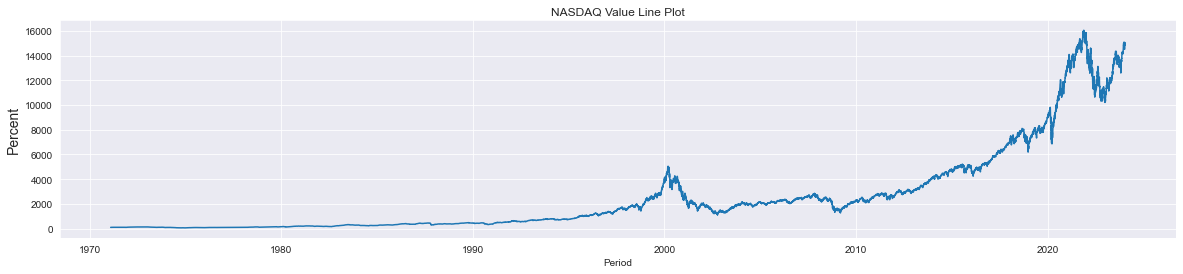

In [36]:
## SETTING TIME SERIES LINE PLOT 

sns.set_style('darkgrid')
plt.figure(figsize=(20, 4))

plt.title('NASDAQ Value Line Plot', fontsize=12)
plt.ylabel('Percent', fontsize=14)
plt.xlabel('Period')

sns.lineplot(x=db_nasdaq['date'], y=db_nasdaq['nasdaq_value'])

plt.show()

    Main DataBase

In [43]:
## MERGING DATABASES INTO ONE

db_core = db_oil.loc[db_oil['date'] >= '2000-01-01']
db_core['date'] = db_core['date'].astype("string")

db_merge = db_euro.loc[db_euro['date'] >= '2000-01-01']
db_merge['date'] = db_merge['date'].astype("string")

db_main = db_core.join(db_merge.set_index('date'), on='date')

db_main.head()

LOAD

[]

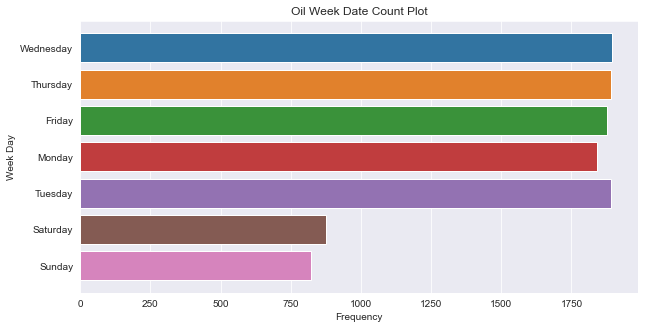

In [44]:
## DATAVIZ COUNT PLOT

fig, ax = plt.subplots(figsize=(10,5))

sns.countplot(data=db_oil, y="week_date")

plt.title('Oil Week Date Count Plot')
plt.xlabel('Frequency')
plt.ylabel('Week Day')

# plt.savefig(r'..\plots\countplot_dia_semana.png', bbox_inches='tight')

plt.plot()

[]

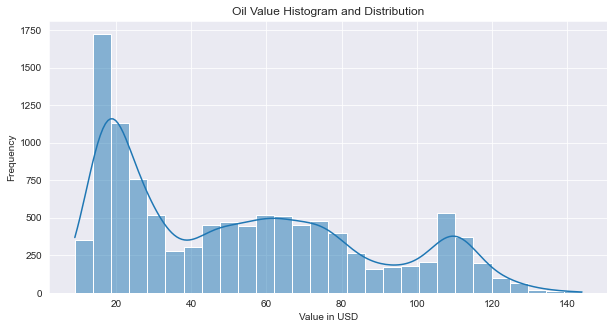

In [46]:
## DATAVIZ HISTOGRAM AND DISTRIBUTION

fig, ax = plt.subplots(figsize=(10,5))

sns.histplot(data=db_oil, x="oil_value_usd", kde=True)

plt.title('Oil Value Histogram and Distribution')
plt.xlabel('Value in USD')
plt.ylabel('Frequency')

# plt.savefig(r'..\plots\histogram_distribution_fechamento.png', bbox_inches='tight')

plt.plot()

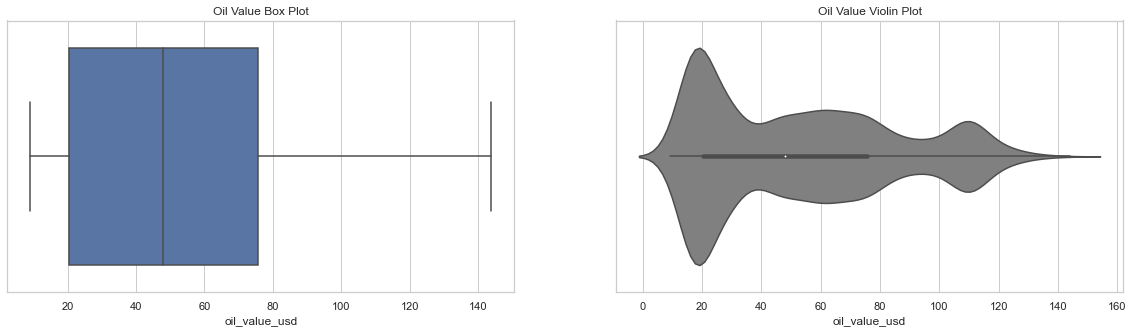

In [51]:
## DATAVIZ BOX PLOT AND VIOLIN PLOT

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

#Box Plot
sns.set(style="whitegrid")
sns.boxplot(x="oil_value_usd", data=db_oil, ax=axes[0])
axes[0].set_title('Oil Value Box Plot')
# axes[0].xlabel('Value in USD')


#Violin Plot 
sns.violinplot(x="oil_value_usd", data=db_oil, color="gray", ax=axes[1])
axes[1].set_title('Oil Value Violin Plot')
# axes[1].xlabel('Value in USD')

# plt.savefig(r'..\plots\boxplot_violinplot_fechamento.png', bbox_inches='tight')

plt.show()

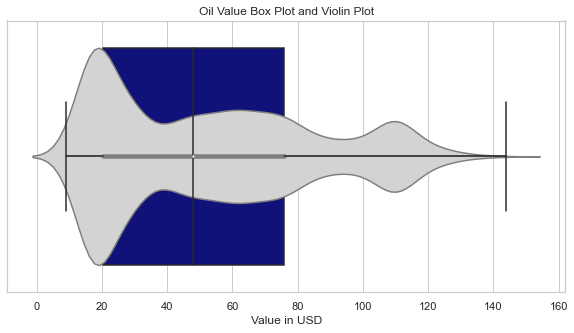

In [53]:
## DATAVIZ BOX PLOT + VIOLIN PLOT

fig, ax = plt.subplots(figsize=(10,5))

sns.violinplot(x='oil_value_usd', data=db_oil, ax=ax, color='lightgray')
sns.boxplot(x='oil_value_usd', data=db_oil, ax=ax, whis=1.5, color='darkblue')
ax.set_title('Oil Value Box Plot and Violin Plot')
plt.xlabel('Value in USD')

# plt.savefig(r'..\plots\boxplot_violinplot_union_fechamento.png', bbox_inches='tight')

plt.show()

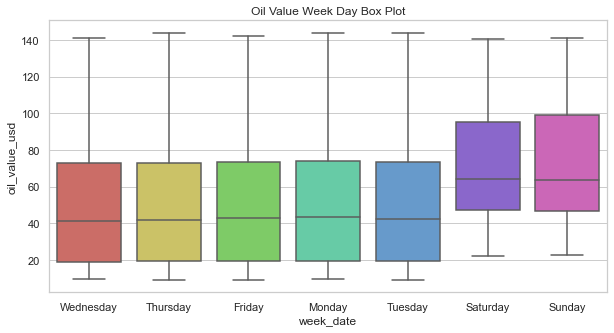

In [54]:
## DATAVIZ BOX PLOT

fig, ax = plt.subplots(figsize=(10,5))

sns.boxplot(x='week_date', y='oil_value_usd', data=db_oil, palette='hls')
ax.set_title('Oil Value Week Day Box Plot')

# plt.savefig(r'..\plots\boxplot_dia_semana_fechamento.png', bbox_inches='tight')

plt.show()

In [57]:
# ## DATAVIZ DISTRIBUTION PLOT

# # Database References
db_oil_viz = db_oil.loc[db_oil['date'] >= '2000-01-01']
db_oil_viz = db_oil_viz['oil_value_usd']

db_euro_viz = db_euro.loc[db_euro['date'] >= '2000-01-01']
db_euro_viz = db_euro_viz['euro_value_usd']

db_nasdaq_viz = db_nasdaq.loc[db_euro['date'] >= '2000-01-01']
db_nasdaq_viz = db_nasdaq_viz['nasdaq_value']

db_dolar_viz = db_dolar.loc[db_euro['date'] >= '2000-01-01']
db_dolar_viz = db_dolar_viz['dolar_value_brl']


# # Distribution Plot

plt.figure(figsize=(20, 5))

sns.kdeplot(data=db_oil_viz, label='Oil Price Data', fill=True)
sns.kdeplot(data=db_euro_viz, label='Euro Value Data', fill=True)
sns.kdeplot(data=db_nasdaq_viz, label='NASDAQ Value Data', fill=True)
sns.kdeplot(data=db_dolar_viz, label='Dolar Value Data', fill=True)

plt.title('Data Value Distribution')
plt.xlabel('Reference')
plt.ylabel('Density')
plt.legend()

# plt.savefig(r'..\plots\distribuicao_abertura_fechamento_min_max.png', bbox_inches='tight')

plt.show()

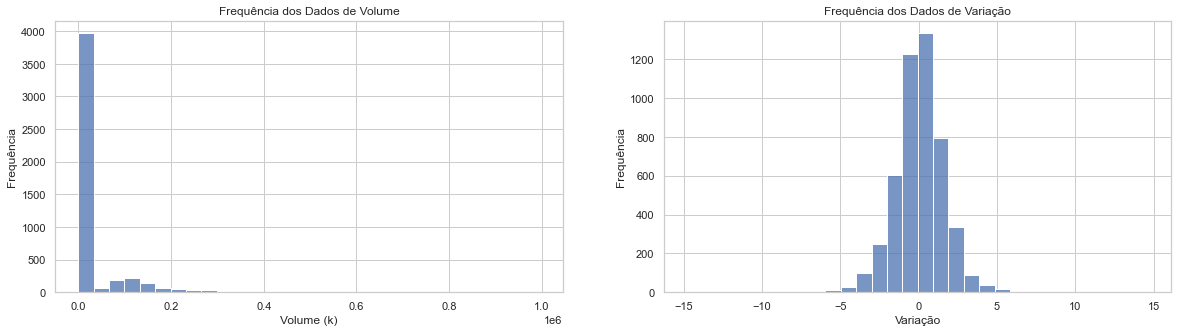

In [156]:
# Database References

db_vol = db_oil['Volume (K)'] 
db_var = db_oil['Variacao'] 

# Histogram Plot
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Volume Plot
sns.histplot(data=db_vol, bins=30, ax=axes[0])
axes[0].set_title('Frequência dos Dados de Volume')
axes[0].set_xlabel('Volume (k)')
axes[0].set_ylabel('Frequência')

# Variacao Plot
sns.histplot(data=db_var, bins=30, ax=axes[1])
axes[1].set_title('Frequência dos Dados de Variação')
axes[1].set_xlabel('Variação')
axes[1].set_ylabel('Frequência')


# fig.tight_layout()
plt.savefig(r'..\plots\histograma_volume_variacao.png', bbox_inches='tight')

plt.show()

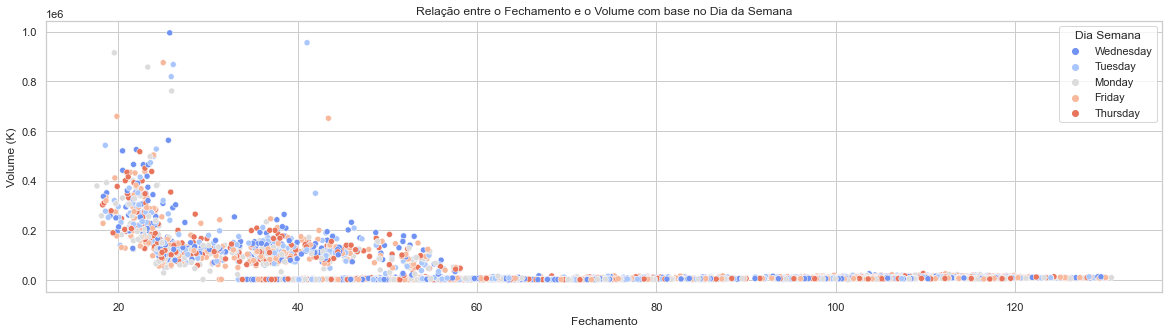

In [157]:
# Dispersão Plot

plt.figure(figsize=(20, 5))

sns.scatterplot(x='Último', y='Volume (K)', hue='Dia Semana', data=db_oil, palette='coolwarm')

plt.xlabel('Fechamento')
plt.ylabel('Volume (K)')
plt.title('Relação entre o Fechamento e o Volume com base no Dia da Semana')

plt.savefig(r'..\plots\dispersao_volume_fechamento_dia_semana.png', bbox_inches='tight')

plt.show()

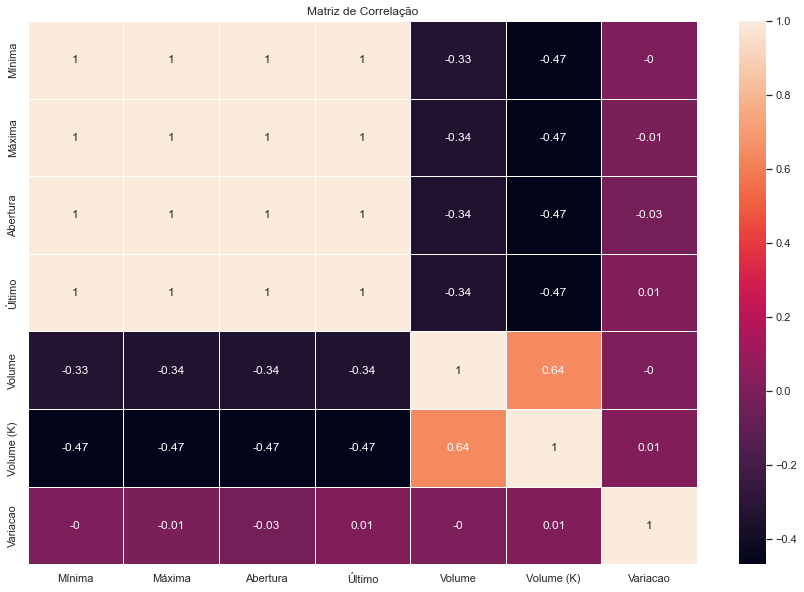

In [158]:
# Database References

correlation_matrix = db_oil.corr().round(2)


# Matriz de Correlação

fig, ax = plt.subplots(figsize=(15,10))

sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)
plt.title('Matriz de Correlação')

plt.savefig(r'..\plots\matriz_correlacao.png', bbox_inches='tight')

plt.show()

In [159]:
# db_oil['Volume'] = db_oil['Volume'].str.extract('(\d+)', expand=False)

# s.str.extract(r'([ab])(\d)')

# db_oil['Volume (M)'] = db_oil['Volume (M)'].str.replace('M','')
# db_oil['Volume (M)'] = db_oil['Volume (M)'].replace(',', '.', regex=True)

# db_oil['Variacao (%)'] = db_oil['Variacao (%)'].str.replace('%','')
# db_oil['Variacao (%)'] = db_oil['Variacao (%)'].replace(',', '.', regex=True)

# db_oil['Volume (M)'] = db_oil['Volume (M)'].str[-1:]

# db_oil['Vol.'] = pd.to_numeric(db_oil['Vol.'])
# db_oil['Var%'] = pd.to_numeric(db_oil['Var%'])
# db_oil.astype({'Vol.': 'float64'}).dtypes
# db_oil['Volume (M)'] = db_oil['Volume (M)'].astype(float)
# db_oil['Variacao (%)'] = db_oil['Variacao (%)'].astype(float)
# db_oil['Volume (M)'] = pd.to_numeric(db_oil['Volume (M)'])